# Main Jupyter Noootbook

## Imports

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from nlp_preprocessing import VIA_GoGo
from sklearn.svm import LinearSVC



## EDA

In [3]:
tweet_df = pd.read_csv('data\db_tweet_emotion.csv', encoding= 'unicode_escape')

In [4]:
tweet_df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
tweet = tweet_df['tweet_text']
directed = tweet_df['emotion_in_tweet_is_directed_at']
emotion = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']

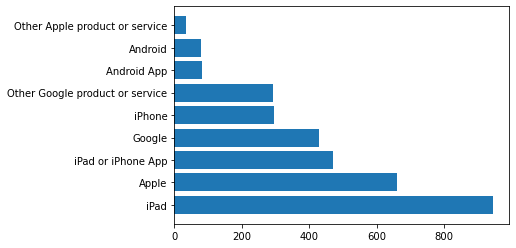

In [7]:
plt.barh(directed.value_counts().index, directed.value_counts().values);

In [8]:
directed.value_counts().sum()

3291

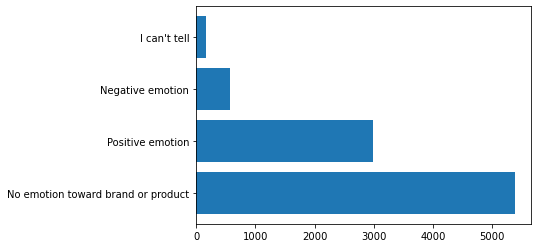

In [9]:
plt.barh(emotion.value_counts().index, emotion.value_counts().values);

In [10]:
emotion.value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Clean Up & Tokenize

In [203]:
# Instantiating tokenizer
tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")

# Create a list of stopwords in English
sw = stopwords.words('english')


In [204]:
sw.append('link')
sw.append('rt')
sw.append('sxsw')
sw.append('quot')

In [205]:
vg = VIA_GoGo()

In [206]:

clean_df = vg.clean_tokenizer(tweet_df, tokenizer, sw)
clean_df


,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale]",swonderlin wait ipad also sale
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[hope, year, festival, crashy, year, iphone, app]",hope year festival crashy year iphone app
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, marissa, mayer,...",sxtxstate great stuff fri marissa mayer google...
...,...,...,...,...,...,...,...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[mention, yup, third, app, yet, android, sugge...",mention yup third app yet android suggestion c...
9085,ipad everywhere. #sxsw {link},iPad,Positive emotion,1,Apple,"[ipad, everywhere]",ipad everywhere
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, mention, interrupt, regularly, sc...",wave buzz mention interrupt regularly schedule...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [207]:
pos_neg_df = clean_df[clean_df.emotion_num != 0]

In [208]:
clean_df.emotion_num.value_counts()

 0    5541
 1    2978
-1     570
Name: emotion_num, dtype: int64

In [209]:
pos_neg_df.emotion_num.value_counts()

 1    2978
-1     570
Name: emotion_num, dtype: int64

In [210]:
from nltk import FreqDist

In [211]:
frequency_dist_all = FreqDist(clean_df["tweet_text_tokenized"].explode())

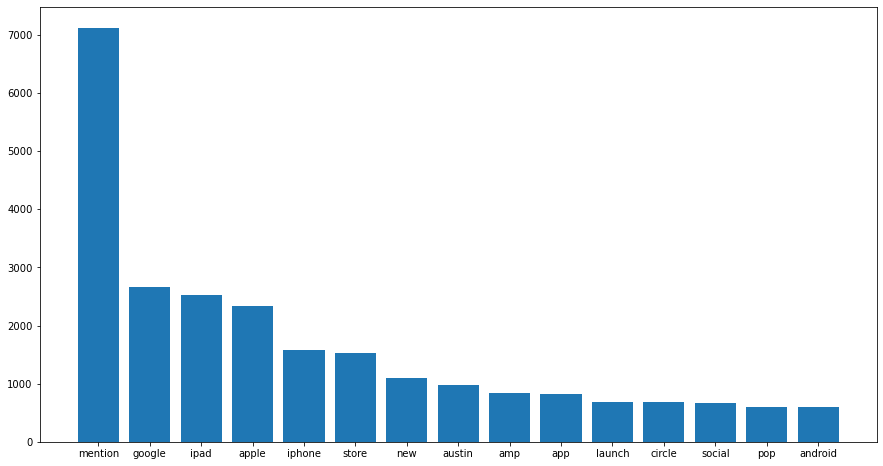

In [212]:
top_ten = list(zip(*frequency_dist_all.most_common(15)))
tokens = top_ten[0]
counts = top_ten[1]

plt.figure(figsize=(15, 8))
plt.bar(tokens, counts);

In [213]:
frequency_dist_all = FreqDist(pos_neg_df["tweet_text_tokenized"].explode())

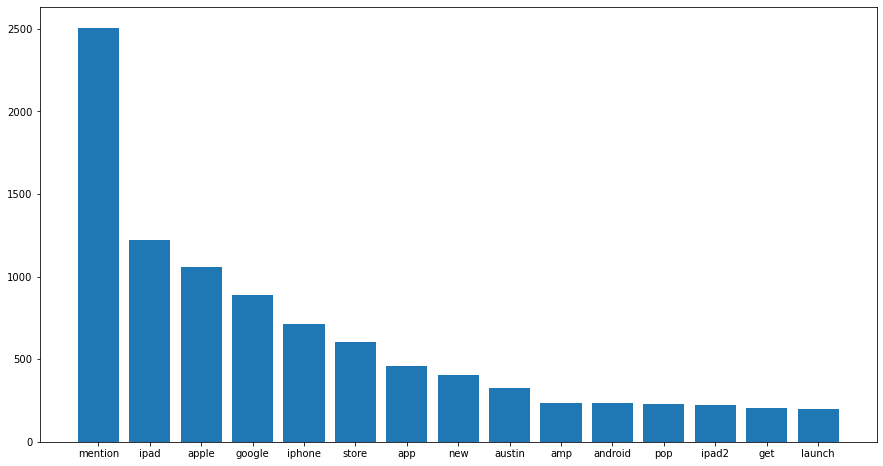

In [214]:
top_ten = list(zip(*frequency_dist_all.most_common(15)))
tokens = top_ten[0]
counts = top_ten[1]

plt.figure(figsize=(15, 8))
plt.bar(tokens, counts);

In [215]:
X_train, X_test, y_train, y_test = train_test_split(clean_df['joined_tokens'], 
                                                    clean_df['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [216]:
X_train_pn, X_test_pn, y_train_pn, y_test_pn = train_test_split(pos_neg_df['joined_tokens'], 
                                                    pos_neg_df['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [217]:
# Using Linear Support Vector Machine
sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=True)),
               ('clf', SGDClassifier(random_state=10)),
              ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


accuracy 0.7061152661680599


In [26]:
# Using Linear Support Vector Machine
sgd_pn = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier(random_state=10)),
              ])
sgd_pn.fit(X_train_pn, y_train_pn)

y_pred_pn = sgd_pn.predict(X_test_pn)

print('accuracy %s' % accuracy_score(y_pred_pn, y_test_pn))

accuracy 0.8816234498308907


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(sgd_pn, X_test_pn, y_test_pn, cv=10)

array([0.80898876, 0.88764045, 0.84269663, 0.85393258, 0.87640449,
       0.91011236, 0.82022472, 0.875     , 0.80681818, 0.86363636])

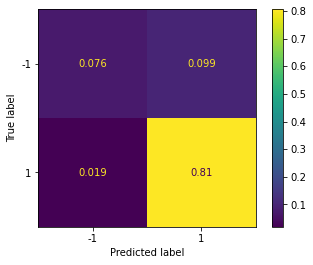

In [29]:
plot_confusion_matrix(sgd_pn, X_test_pn, y_test_pn, normalize='all')


In [30]:
# Using Naive Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.673559172899252


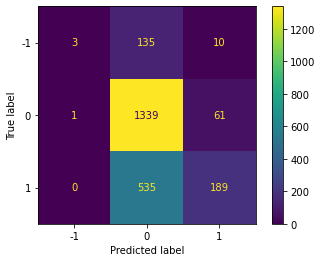

In [31]:
plot_confusion_matrix(naive, X_test, y_test)

In [32]:
# Using Logistic Regression
log_reg = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=5)),
              ])
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.6981962164540255


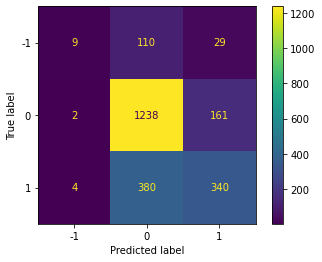

In [33]:
plot_confusion_matrix(log_reg, X_test, y_test);

### Playgorund

In [88]:
cv_num = 10

In [89]:
# Using SGDClassifier
sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier(random_state=10)),
              ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('Accuracy', accuracy_score(y_pred, y_test))
print(f'Mean Accuracy (cv={cv_num})', cross_val_score(svc, X_test, y_test, scoring='accuracy', cv=cv_num).mean())


Accuracy 0.7078750549934008
Mean Accuracy (cv=10) 0.6550969935852848


In [70]:
# Vectorize
count_vect = CountVectorizer(ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(X_train)

# Transform
tfidf_transformer = TfidfTransformer(smooth_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Classify
clf = SGDClassifier(random_state=10).fit(X_train_tfidf, y_train)

# Predict
y_pred = clf.predict(tfidf_transformer.transform(count_vect.transform(X_test)))

# Accuracy score
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7078750549934008


In [96]:
# Manual tweet input to test labeling
print(clf.predict(tfidf_transformer.transform(count_vect.transform(['love google phone hate feature']))))

[1]


In [180]:
# Using LinearSVC
svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC(random_state=10)),
              ])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Accuracy', accuracy_score(y_pred, y_test))
print(f'Mean Accuracy (cv={cv_num})', cross_val_score(svc, X_test, y_test, scoring='accuracy', cv=cv_num).mean())


Accuracy 0.702595688517378
Mean Accuracy (cv=10) 0.6550969935852848


#### Under Sample

In [99]:
playground_clean = vg.clean_tokenizer(tweet_df, tokenizer, sw)

In [102]:
playground_clean[playground_clean.emotion_num == 0]

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
5,@teachntech00 new ipad apps for #speechtherapy...,NaN,No emotion toward brand or product,0,Apple,"[teachntech00, new, ipad, apps, speechtherapy,...",teachntech00 new ipad apps speechtherapy commu...
15,holler gram for ipad on the itunes app store -...,NaN,No emotion toward brand or product,0,Apple,"[holler, gram, ipad, itunes, app, store, http,...",holler gram ipad itunes app store http co kfn3...
31,"attn: all #sxsw frineds, @mention register fo...",NaN,No emotion toward brand or product,0,Google,"[attn, frineds, register, gdgtlive, see, cobra...",attn frineds register gdgtlive see cobra irada...
32,anyone at #sxsw want to sell their old ipad?,NaN,No emotion toward brand or product,0,Apple,"[anyone, want, sell, old, ipad]",anyone want sell old ipad
33,anyone at #sxsw who bought the new ipad want ...,NaN,No emotion toward brand or product,0,Apple,"[anyone, bought, new, ipad, want, sell, older,...",anyone bought new ipad want sell older ipad
...,...,...,...,...,...,...,...
9083,google says: want to give a lightning talk to ...,NaN,No emotion toward brand or product,0,Google,"[google, say, want, give, lightning, talk, h4c...",google say want give lightning talk h4ckers au...
9084,"@mention yup, but i don't have a third app yet...",NaN,No emotion toward brand or product,0,Google,"[yup, third, app, yet, android, suggestion, cc]",yup third app yet android suggestion cc
9086,"wave, buzz... rt @mention we interrupt your re...",NaN,No emotion toward brand or product,0,Google,"[wave, buzz, interrupt, regularly, scheduled, ...",wave buzz interrupt regularly scheduled geek p...
9087,"google's zeiger, a physician never reported po...",NaN,No emotion toward brand or product,0,Google,"[google, zeiger, physician, never, reported, p...",google zeiger physician never reported potenti...


In [104]:
X_train_play, X_test_play, y_train_play, y_test_play = train_test_split(playground_clean['joined_tokens'], 
                                                    playground_clean['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

##### equalizing labels (422)

In [139]:
y_arr = y_train_play.values
reshaped_y = y_arr.reshape(-1,1)
reshaped_y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [140]:
X_arr = X_train_play.values
reshaped_X = X_arr.reshape(-1,1)
reshaped_X

array([['lost iphone black parra hard case pink cloud thunderbolt back email deshi80227 thanks'],
       ['google social network rumored launch soon googlecircles gsdm'],
       ['search via twitter work check google real time search least get result'],
       ...,
       ['hope people ask tough question reminder android chrome tt talk pm today'],
       ['going awesome gallery original daniel johnston art going tomorrow gsdm google industry party'],
       ['apple opening pop store austin geekfest apple applesxsw southbysouthwest']],
      dtype=object)

In [141]:
from imblearn.under_sampling import RandomUnderSampler

# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X_rus, y_rus = rus.fit_resample(reshaped_X, reshaped_y)

In [152]:
X_train_playground = pd.Series(X_rus.reshape(-1,))

In [154]:
y_train_playground = pd.Series(y_rus)


y_train_playground.value_counts()

 1    422
 0    422
-1    422
dtype: int64

In [155]:
# Using LinearSVC
svc = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC(random_state=10)),
              ])
svc.fit(X_train_playground, y_train_playground)

y_pred = svc.predict(X_test)

print('Accuracy', accuracy_score(y_pred, y_test))
print(f'Mean Accuracy (cv={cv_num})', cross_val_score(svc, X_test, y_test, scoring='accuracy', cv=cv_num).mean())

Accuracy 0.5116586009678838
Mean Accuracy (cv=10) 0.6550969935852848


##### halfing neutral label

In [157]:
neutral = playground_clean[playground_clean.emotion_num == 0]
pos_and_neg = playground_clean[playground_clean.emotion_num != 0]

In [158]:
len(neutral)

5541

In [175]:
half_neutral = neutral.iloc[:2770]

In [176]:
frames = [pos_and_neg, half_neutral]

result = pd.concat(frames)
result

,tweet_text,directed_at,emotion,emotion_num,brand,tweet_text_tokenized,joined_tokens
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,Negative emotion,-1,Apple,"[wesley83, 3g, iphone, hr, tweeting, rise_aust...",wesley83 3g iphone hr tweeting rise_austin dea...
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,Positive emotion,1,Apple,"[jessedee, know, fludapp, awesome, ipad, iphon...",jessedee know fludapp awesome ipad iphone app ...
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,Positive emotion,1,Apple,"[swonderlin, wait, ipad, also, sale]",swonderlin wait ipad also sale
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,-1,Apple,"[hope, year, festival, crashy, year, iphone, app]",hope year festival crashy year iphone app
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,Positive emotion,1,Google,"[sxtxstate, great, stuff, fri, marissa, mayer,...",sxtxstate great stuff fri marissa mayer google...
...,...,...,...,...,...,...,...
4729,#sxsw plans shaping up... wed: playing at @men...,NaN,No emotion toward brand or product,0,Apple,"[plan, shaping, wed, playing, megablaag, fo, s...",plan shaping wed playing megablaag fo sho twit...
4731,"apple plans to keep austin wired, opening a po...",NaN,No emotion toward brand or product,0,Apple,"[apple, plan, keep, austin, wired, opening, po...",apple plan keep austin wired opening pop apple...
4736,check event #sxsw via google maps. lot of buzz...,NaN,No emotion toward brand or product,0,Google,"[check, event, via, google, map, lot, buzz, ov...",check event via google map lot buzz overthere
4737,really want a braille @mention shirt. i've see...,NaN,No emotion toward brand or product,0,Apple,"[really, want, braille, shirt, seen, people, w...",really want braille shirt seen people wear may...


In [178]:
result.emotion_num.value_counts()

 1    2978
 0    2770
-1     570
Name: emotion_num, dtype: int64

In [192]:
X_train_result, X_test_result, y_train_result, y_test_result = train_test_split(result['joined_tokens'], 
                                                    result['emotion_num'], 
                                                    test_size= 0.25,
                                                    random_state= 5)

In [187]:
y_train_result.value_counts()

 1    2250
 0    2078
-1     410
Name: emotion_num, dtype: int64

In [194]:
# Using SGDClassifier
sgd_result = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier(random_state=5)),
              ])
sgd_result.fit(X_train_result, y_train_result)

y_pred = sgd_result.predict(X_test_result)

print('Accuracy', accuracy_score(y_pred, y_test))
print(f'Mean Accuracy (cv={cv_num})', cross_val_score(sgd_result, X_test, y_test, scoring='accuracy', cv=cv_num).mean())


Accuracy 0.7835459744830621
Mean Accuracy (cv=10) 0.6251449107349873


In [195]:
cross_val_score(sgd_result, X_test, y_test, scoring='accuracy', cv=20)

array([0.64035088, 0.63157895, 0.72807018, 0.64035088, 0.5877193 ,
       0.62280702, 0.62280702, 0.55263158, 0.59649123, 0.68421053,
       0.60526316, 0.60526316, 0.64912281, 0.69911504, 0.65486726,
       0.52212389, 0.61061947, 0.69026549, 0.66371681, 0.6460177 ])

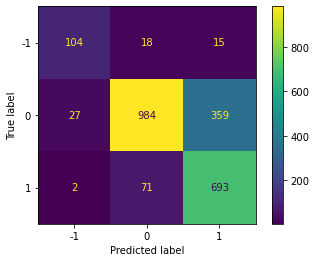

In [196]:
plot_confusion_matrix(sgd_result, X_test, y_test);

In [193]:
X_train, X_test, y_train, y_test = train_test_split(clean_df['joined_tokens'], 
                                                    clean_df['emotion_num'], 
                                                    test_size= 0.25,
                                                    )